In [1]:
import pandas as pd
import numpy as np
df1 = pd.DataFrame({'name': ['John', 'George', 'Ringo'], 
                    'color': ['Blue', 'Blue', 'Purple']})
df2 = pd.DataFrame({'name': ['Paul', 'George', 'Ringo'], 
                    'carcolor': ['Red', 'Blue', np.nan]},
                   index=[3, 1, 2])

In [2]:
pd.concat([df1, df2])

,name,color,carcolor
0,John,Blue,NaN
1,George,Blue,NaN
2,Ringo,Purple,NaN
3,Paul,NaN,Red
1,George,NaN,Blue
2,Ringo,NaN,NaN


In [3]:
pd.concat([df1, df2], verify_integrity=True)       # doctest: +NORMALIZE_WHITESPACE

ValueError: Indexes have overlapping values: Int64Index([1, 2], dtype='int64')

In [4]:
pd.concat([df1, df2], ignore_index=True)

,name,color,carcolor
0,John,Blue,NaN
1,George,Blue,NaN
2,Ringo,Purple,NaN
3,Paul,NaN,Red
4,George,NaN,Blue
5,Ringo,NaN,NaN


In [5]:
pd.concat([df1, df2], axis=1)

,name,color,name,carcolor
0,John,Blue,NaN,NaN
1,George,Blue,George,Blue
2,Ringo,Purple,Ringo,NaN
3,NaN,NaN,Paul,Red


In [6]:
df1.set_index('name').join(df2.set_index('name'))        # doctest: +NORMALIZE_WHITESPACE

,color,carcolor
name,,
John,Blue,NaN
George,Blue,Blue
Ringo,Purple,NaN


In [7]:
df1.merge(df2)  # inner join

,name,color,carcolor
0,George,Blue,Blue
1,Ringo,Purple,NaN


In [8]:
df1.merge(df2, how='outer')

,name,color,carcolor
0,John,Blue,NaN
1,George,Blue,Blue
2,Ringo,Purple,NaN
3,Paul,NaN,Red


In [9]:
df1.merge(df2, how='left')

,name,color,carcolor
0,John,Blue,NaN
1,George,Blue,Blue
2,Ringo,Purple,NaN


In [10]:
df1.merge(df2, how='right')

,name,color,carcolor
0,Paul,NaN,Red
1,George,Blue,Blue
2,Ringo,Purple,NaN


In [11]:
df1.merge(df2, how='right', left_on='color',
    right_on='carcolor')

,name_x,color,name_y,carcolor
0,NaN,NaN,Paul,Red
1,John,Blue,George,Blue
2,George,Blue,George,Blue
3,NaN,NaN,Ringo,NaN


In [12]:
df1.merge(df2, how='outer',
    indicator=True)

,name,color,carcolor,_merge
0,John,Blue,NaN,left_only
1,George,Blue,Blue,both
2,Ringo,Purple,NaN,both
3,Paul,NaN,Red,right_only


In [13]:
df1.merge(df2, how='right', left_on='color',
    right_on='carcolor', validate='1:m')

MergeError: Merge keys are not unique in left dataset; not a one-to-many merge

In [17]:
import pandas as pd
url = 'https://github.com/mattharrison/datasets/raw/master/data/'\
      'dirtydevil.txt'
df = pd.read_csv(url, skiprows=lambda num: num <34 or num == 35,
                 sep='\t')
def to_us_mountain_time(df_, time_col, tz_col):
    return (df_
            .assign(**{tz_col: df_[tz_col].replace('MDT',
                       'MST7MDT')})

            .groupby(tz_col)
            [time_col]
            .transform(lambda s: pd.to_datetime(s)
                .dt.tz_localize(s.name, ambiguous=True)
                .dt.tz_convert('US/Mountain'))
           )

/home/matt/envs/menv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3418: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [18]:
def tweak_river(df_):
    return (df_
      .assign(datetime=to_us_mountain_time(df_, 'datetime', 'tz_cd'))
      .rename(columns={'144166_00060': 'cfs',
                       '144167_00065': 'gage_height'})
    )

In [19]:
dd = tweak_river(df)
dd

,agency_cd,site_no,datetime,tz_cd,cfs,144166_00060_cd,gage_height,144167_00065_cd
0,USGS,9333500,2001-05-07 01:00:00-06:00,MDT,71.00,A:[91],NaN,NaN
1,USGS,9333500,2001-05-07 01:15:00-06:00,MDT,71.00,A:[91],NaN,NaN
2,USGS,9333500,2001-05-07 01:30:00-06:00,MDT,71.00,A:[91],NaN,NaN
3,USGS,9333500,2001-05-07 01:45:00-06:00,MDT,70.00,A:[91],NaN,NaN
4,USGS,9333500,2001-05-07 02:00:00-06:00,MDT,70.00,A:[91],NaN,NaN
...,...,...,...,...,...,...,...,...
539300,USGS,9333500,2020-09-28 08:30:00-06:00,MDT,9.53,P,6.16,P
539301,USGS,9333500,2020-09-28 08:45:00-06:00,MDT,9.20,P,6.15,P
539302,USGS,9333500,2020-09-28 09:00:00-06:00,MDT,9.20,P,6.15,P
539303,USGS,9333500,2020-09-28 09:15:00-06:00,MDT,9.20,P,6.15,P


In [20]:
url = 'https://github.com/mattharrison/datasets/raw/master/data/'\
      'hanksville.csv'

In [21]:
temp_df = pd.read_csv(url)
def tweak_temp(df_):
    return (df_
           .assign(DATE=pd.to_datetime(df_.DATE)
                .dt.tz_localize('US/Mountain', ambiguous=False))
           .loc[:,['DATE', 'PRCP', 'TMIN', 'TMAX', 'TOBS']]
    )

In [22]:
temp_df = tweak_temp(temp_df)
temp_df

,DATE,PRCP,TMIN,TMAX,TOBS
0,2000-01-01 00:00:00-07:00,0.02,21.0,43.0,28.0
1,2000-01-02 00:00:00-07:00,0.03,24.0,39.0,24.0
2,2000-01-03 00:00:00-07:00,0.00,7.0,39.0,18.0
3,2000-01-04 00:00:00-07:00,0.00,5.0,39.0,25.0
4,2000-01-05 00:00:00-07:00,0.00,10.0,44.0,22.0
...,...,...,...,...,...
6843,2020-09-20 00:00:00-06:00,0.00,46.0,92.0,83.0
6844,2020-09-21 00:00:00-06:00,0.00,47.0,92.0,84.0
6845,2020-09-22 00:00:00-06:00,0.00,54.0,84.0,77.0
6846,2020-09-23 00:00:00-06:00,0.00,47.0,91.0,87.0


In [23]:
(dd
 .merge(temp_df, left_on='datetime', right_on='DATE')
)

,agency_cd,site_no,datetime,tz_cd,cfs,144166_00060_cd,gage_height,144167_00065_cd,DATE,PRCP,TMIN,TMAX,TOBS
0,USGS,9333500,2001-05-08 00:00:00-06:00,MDT,75.00,A:[91],NaN,NaN,2001-05-08 00:00:00-06:00,0.0,43.0,85.0,58.0
1,USGS,9333500,2001-05-09 00:00:00-06:00,MDT,64.00,A:[91],NaN,NaN,2001-05-09 00:00:00-06:00,0.0,36.0,92.0,64.0
2,USGS,9333500,2001-05-10 00:00:00-06:00,MDT,54.00,A:[91],NaN,NaN,2001-05-10 00:00:00-06:00,0.0,50.0,92.0,67.0
3,USGS,9333500,2001-05-11 00:00:00-06:00,MDT,56.00,A:[91],NaN,NaN,2001-05-11 00:00:00-06:00,0.0,46.0,87.0,60.0
4,USGS,9333500,2001-05-12 00:00:00-06:00,MDT,49.00,A:[91],NaN,NaN,2001-05-12 00:00:00-06:00,0.0,45.0,93.0,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4968,USGS,9333500,2020-09-20 00:00:00-06:00,MDT,6.04,P,6.04,P,2020-09-20 00:00:00-06:00,0.0,46.0,92.0,83.0
4969,USGS,9333500,2020-09-21 00:00:00-06:00,MDT,6.83,P,6.07,P,2020-09-21 00:00:00-06:00,0.0,47.0,92.0,84.0
4970,USGS,9333500,2020-09-22 00:00:00-06:00,MDT,6.83,P,6.07,P,2020-09-22 00:00:00-06:00,0.0,54.0,84.0,77.0
4971,USGS,9333500,2020-09-23 00:00:00-06:00,MDT,7.68,P,6.10,P,2020-09-23 00:00:00-06:00,0.0,47.0,91.0,87.0


In [24]:
(dd
 .groupby(pd.Grouper(key='datetime', freq='D'))
 .median()
 .merge(temp_df, left_index=True, right_on='DATE')
)

,site_no,cfs,gage_height,DATE,PRCP,TMIN,TMAX,TOBS
492,9333500.0,71.50,NaN,2001-05-07 00:00:00-06:00,0.0,41.0,82.0,55.0
493,9333500.0,69.00,NaN,2001-05-08 00:00:00-06:00,0.0,43.0,85.0,58.0
494,9333500.0,63.50,NaN,2001-05-09 00:00:00-06:00,0.0,36.0,92.0,64.0
495,9333500.0,55.00,NaN,2001-05-10 00:00:00-06:00,0.0,50.0,92.0,67.0
496,9333500.0,55.00,NaN,2001-05-11 00:00:00-06:00,0.0,46.0,87.0,60.0
...,...,...,...,...,...,...,...,...
6843,9333500.0,6.83,6.07,2020-09-20 00:00:00-06:00,0.0,46.0,92.0,83.0
6844,9333500.0,6.83,6.07,2020-09-21 00:00:00-06:00,0.0,47.0,92.0,84.0
6845,9333500.0,7.39,6.09,2020-09-22 00:00:00-06:00,0.0,54.0,84.0,77.0
6846,9333500.0,7.97,6.11,2020-09-23 00:00:00-06:00,0.0,47.0,91.0,87.0


In [25]:
(dd
 .groupby(pd.Grouper(key='datetime', freq='D'))
 .median()
 .merge(temp_df, left_index=True, right_on='DATE',
        how='inner', validate='1:1')
)

,site_no,cfs,gage_height,DATE,PRCP,TMIN,TMAX,TOBS
492,9333500.0,71.50,NaN,2001-05-07 00:00:00-06:00,0.0,41.0,82.0,55.0
493,9333500.0,69.00,NaN,2001-05-08 00:00:00-06:00,0.0,43.0,85.0,58.0
494,9333500.0,63.50,NaN,2001-05-09 00:00:00-06:00,0.0,36.0,92.0,64.0
495,9333500.0,55.00,NaN,2001-05-10 00:00:00-06:00,0.0,50.0,92.0,67.0
496,9333500.0,55.00,NaN,2001-05-11 00:00:00-06:00,0.0,46.0,87.0,60.0
...,...,...,...,...,...,...,...,...
6843,9333500.0,6.83,6.07,2020-09-20 00:00:00-06:00,0.0,46.0,92.0,83.0
6844,9333500.0,6.83,6.07,2020-09-21 00:00:00-06:00,0.0,47.0,92.0,84.0
6845,9333500.0,7.39,6.09,2020-09-22 00:00:00-06:00,0.0,54.0,84.0,77.0
6846,9333500.0,7.97,6.11,2020-09-23 00:00:00-06:00,0.0,47.0,91.0,87.0


/home/matt/envs/menv/lib/python3.8/site-packages/pandas/plotting/_matplotlib/__init__.py:71: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


Text(0.5, 0.98, 'Dirty Devil Metrics (15 day average)')

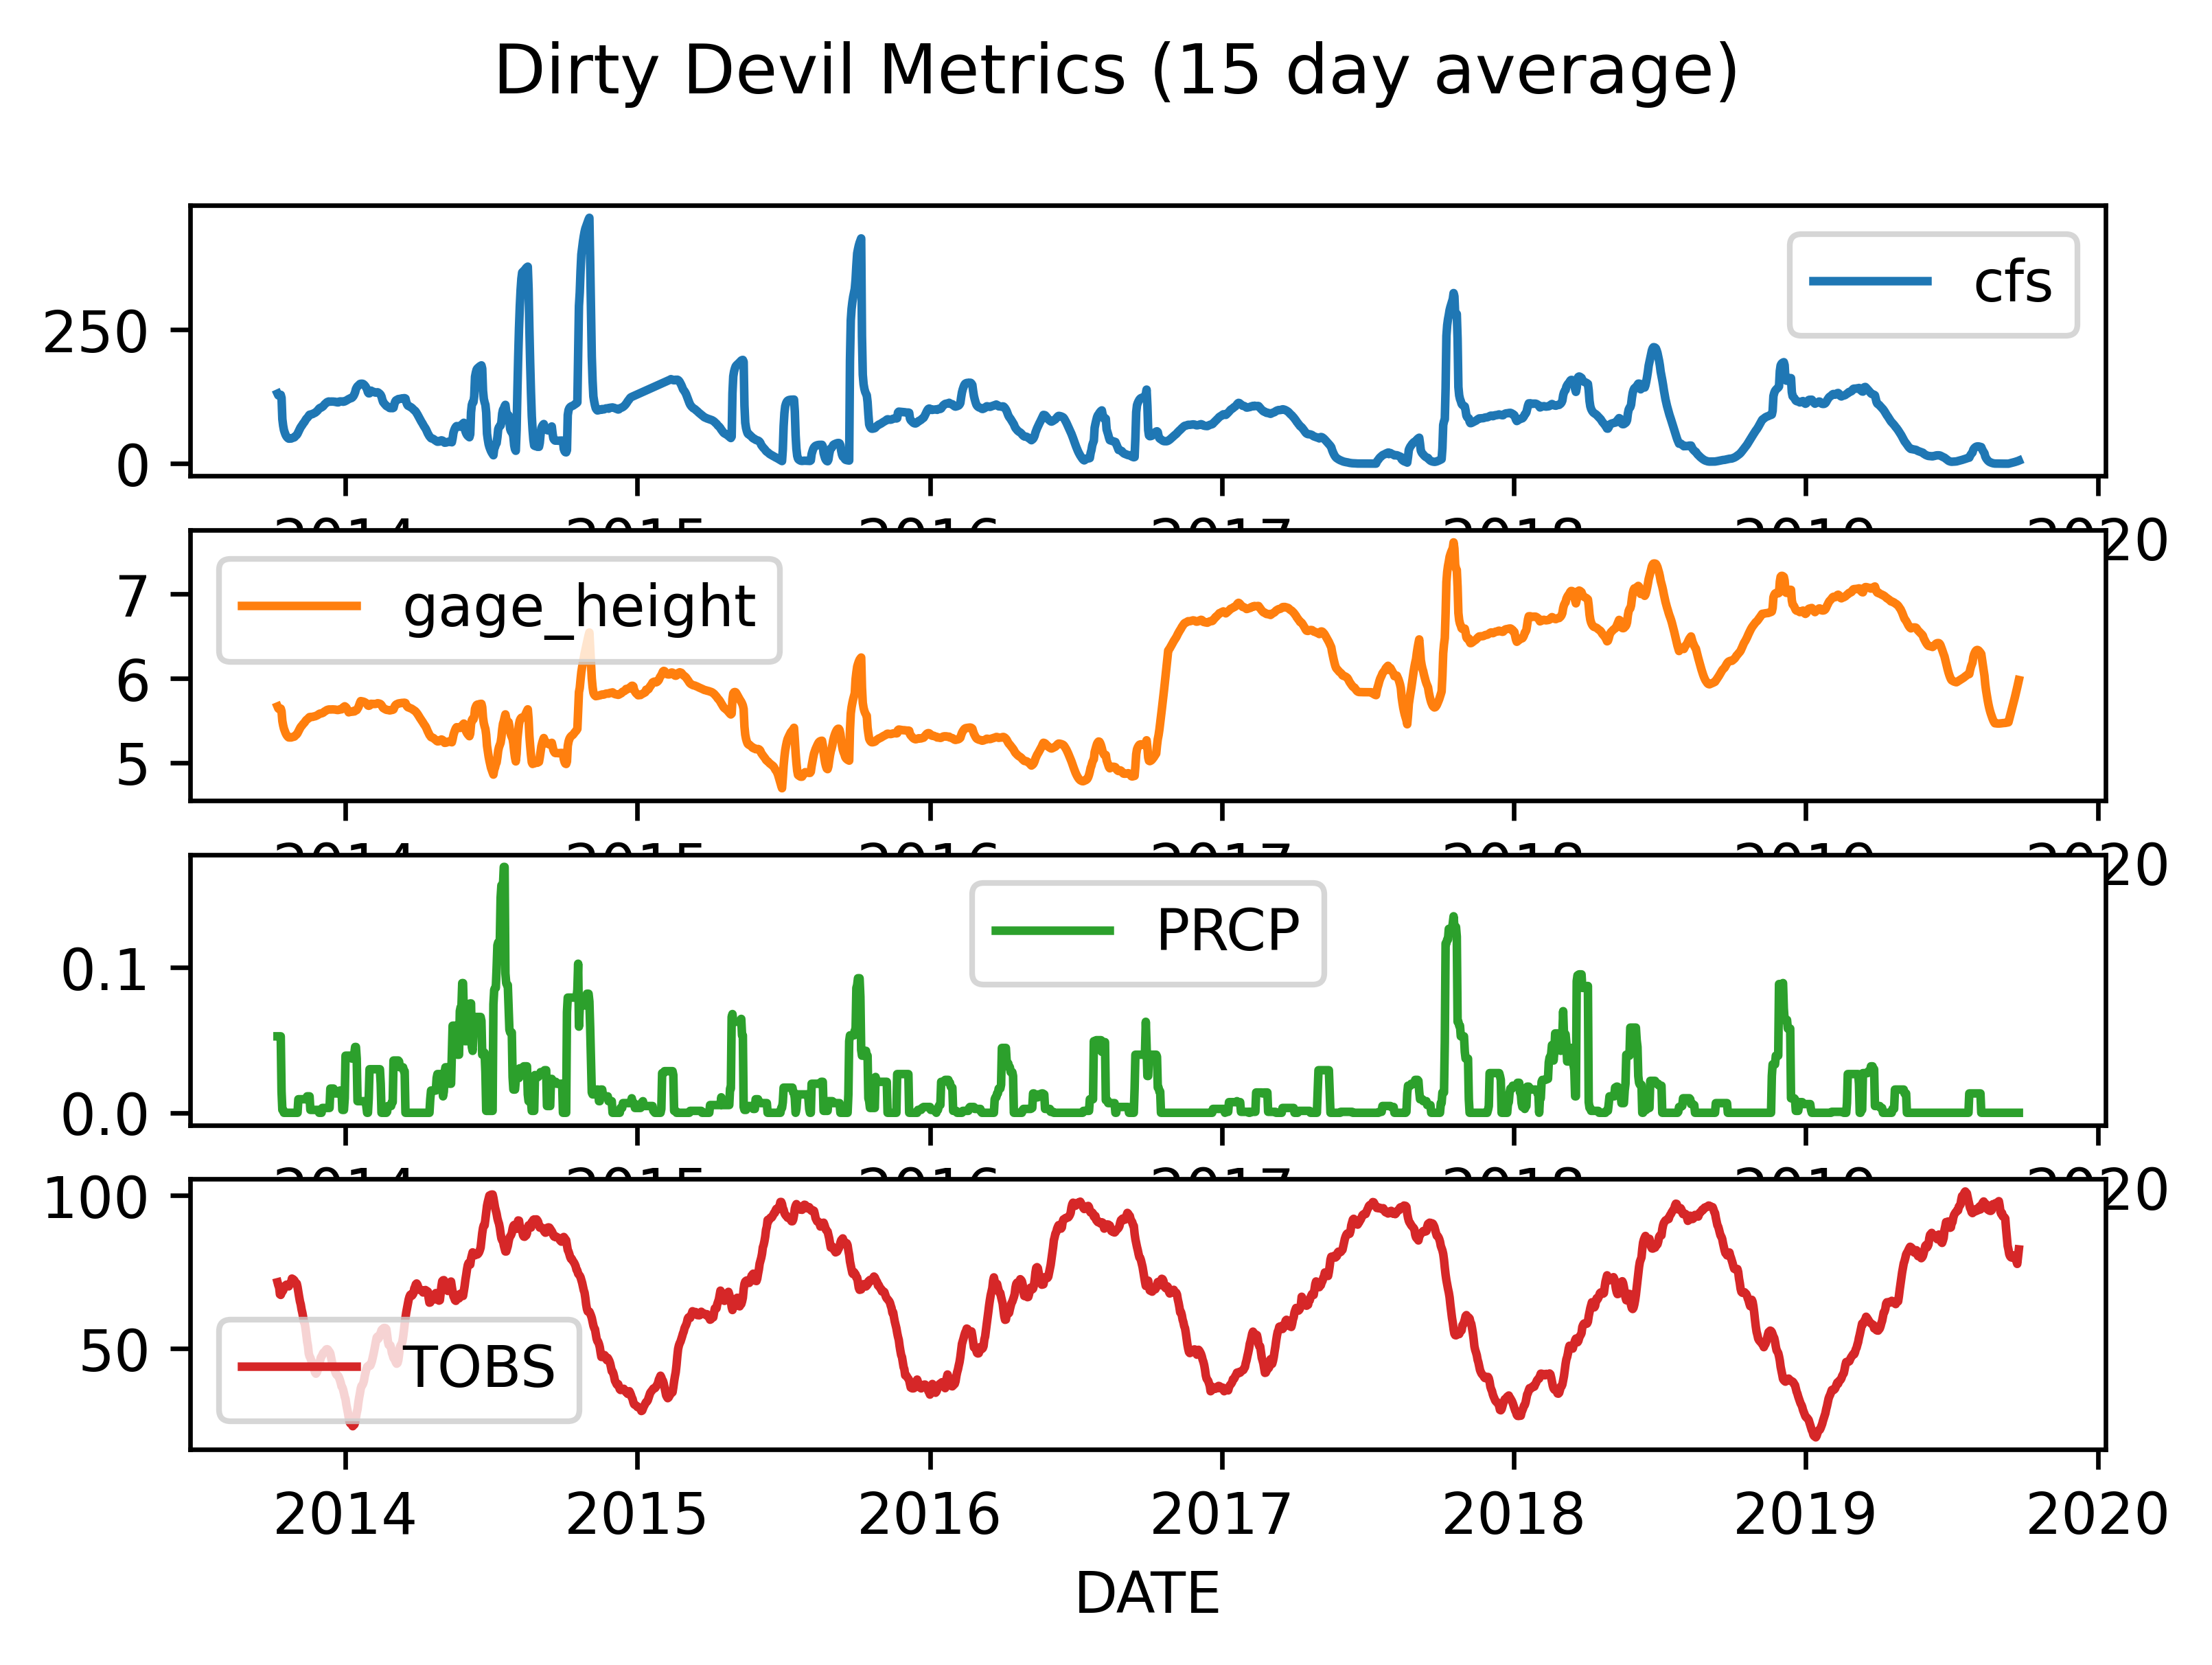

In [29]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(dpi=600)    # doctest: +SKIP
(dd   # doctest: +SKIP
 .groupby(pd.Grouper(key='datetime', freq='D'))
 .median()
 .merge(temp_df, left_index=True, right_on='DATE',
        how='inner', validate='1:1')
 .set_index('DATE')
 .loc['2014':,['cfs', 'gage_height', 'PRCP', 'TOBS']]
 .interpolate()
 .rolling(15)
 .mean()
 .plot(subplots=True, figsize=(10,8), ax=ax)
)
fig.suptitle('Dirty Devil Metrics (15 day average)')

Text(0.5, 1.0, 'Observation Temperature (TOBS) vs River Flow (cubic feet per sec)\nColored by Month')

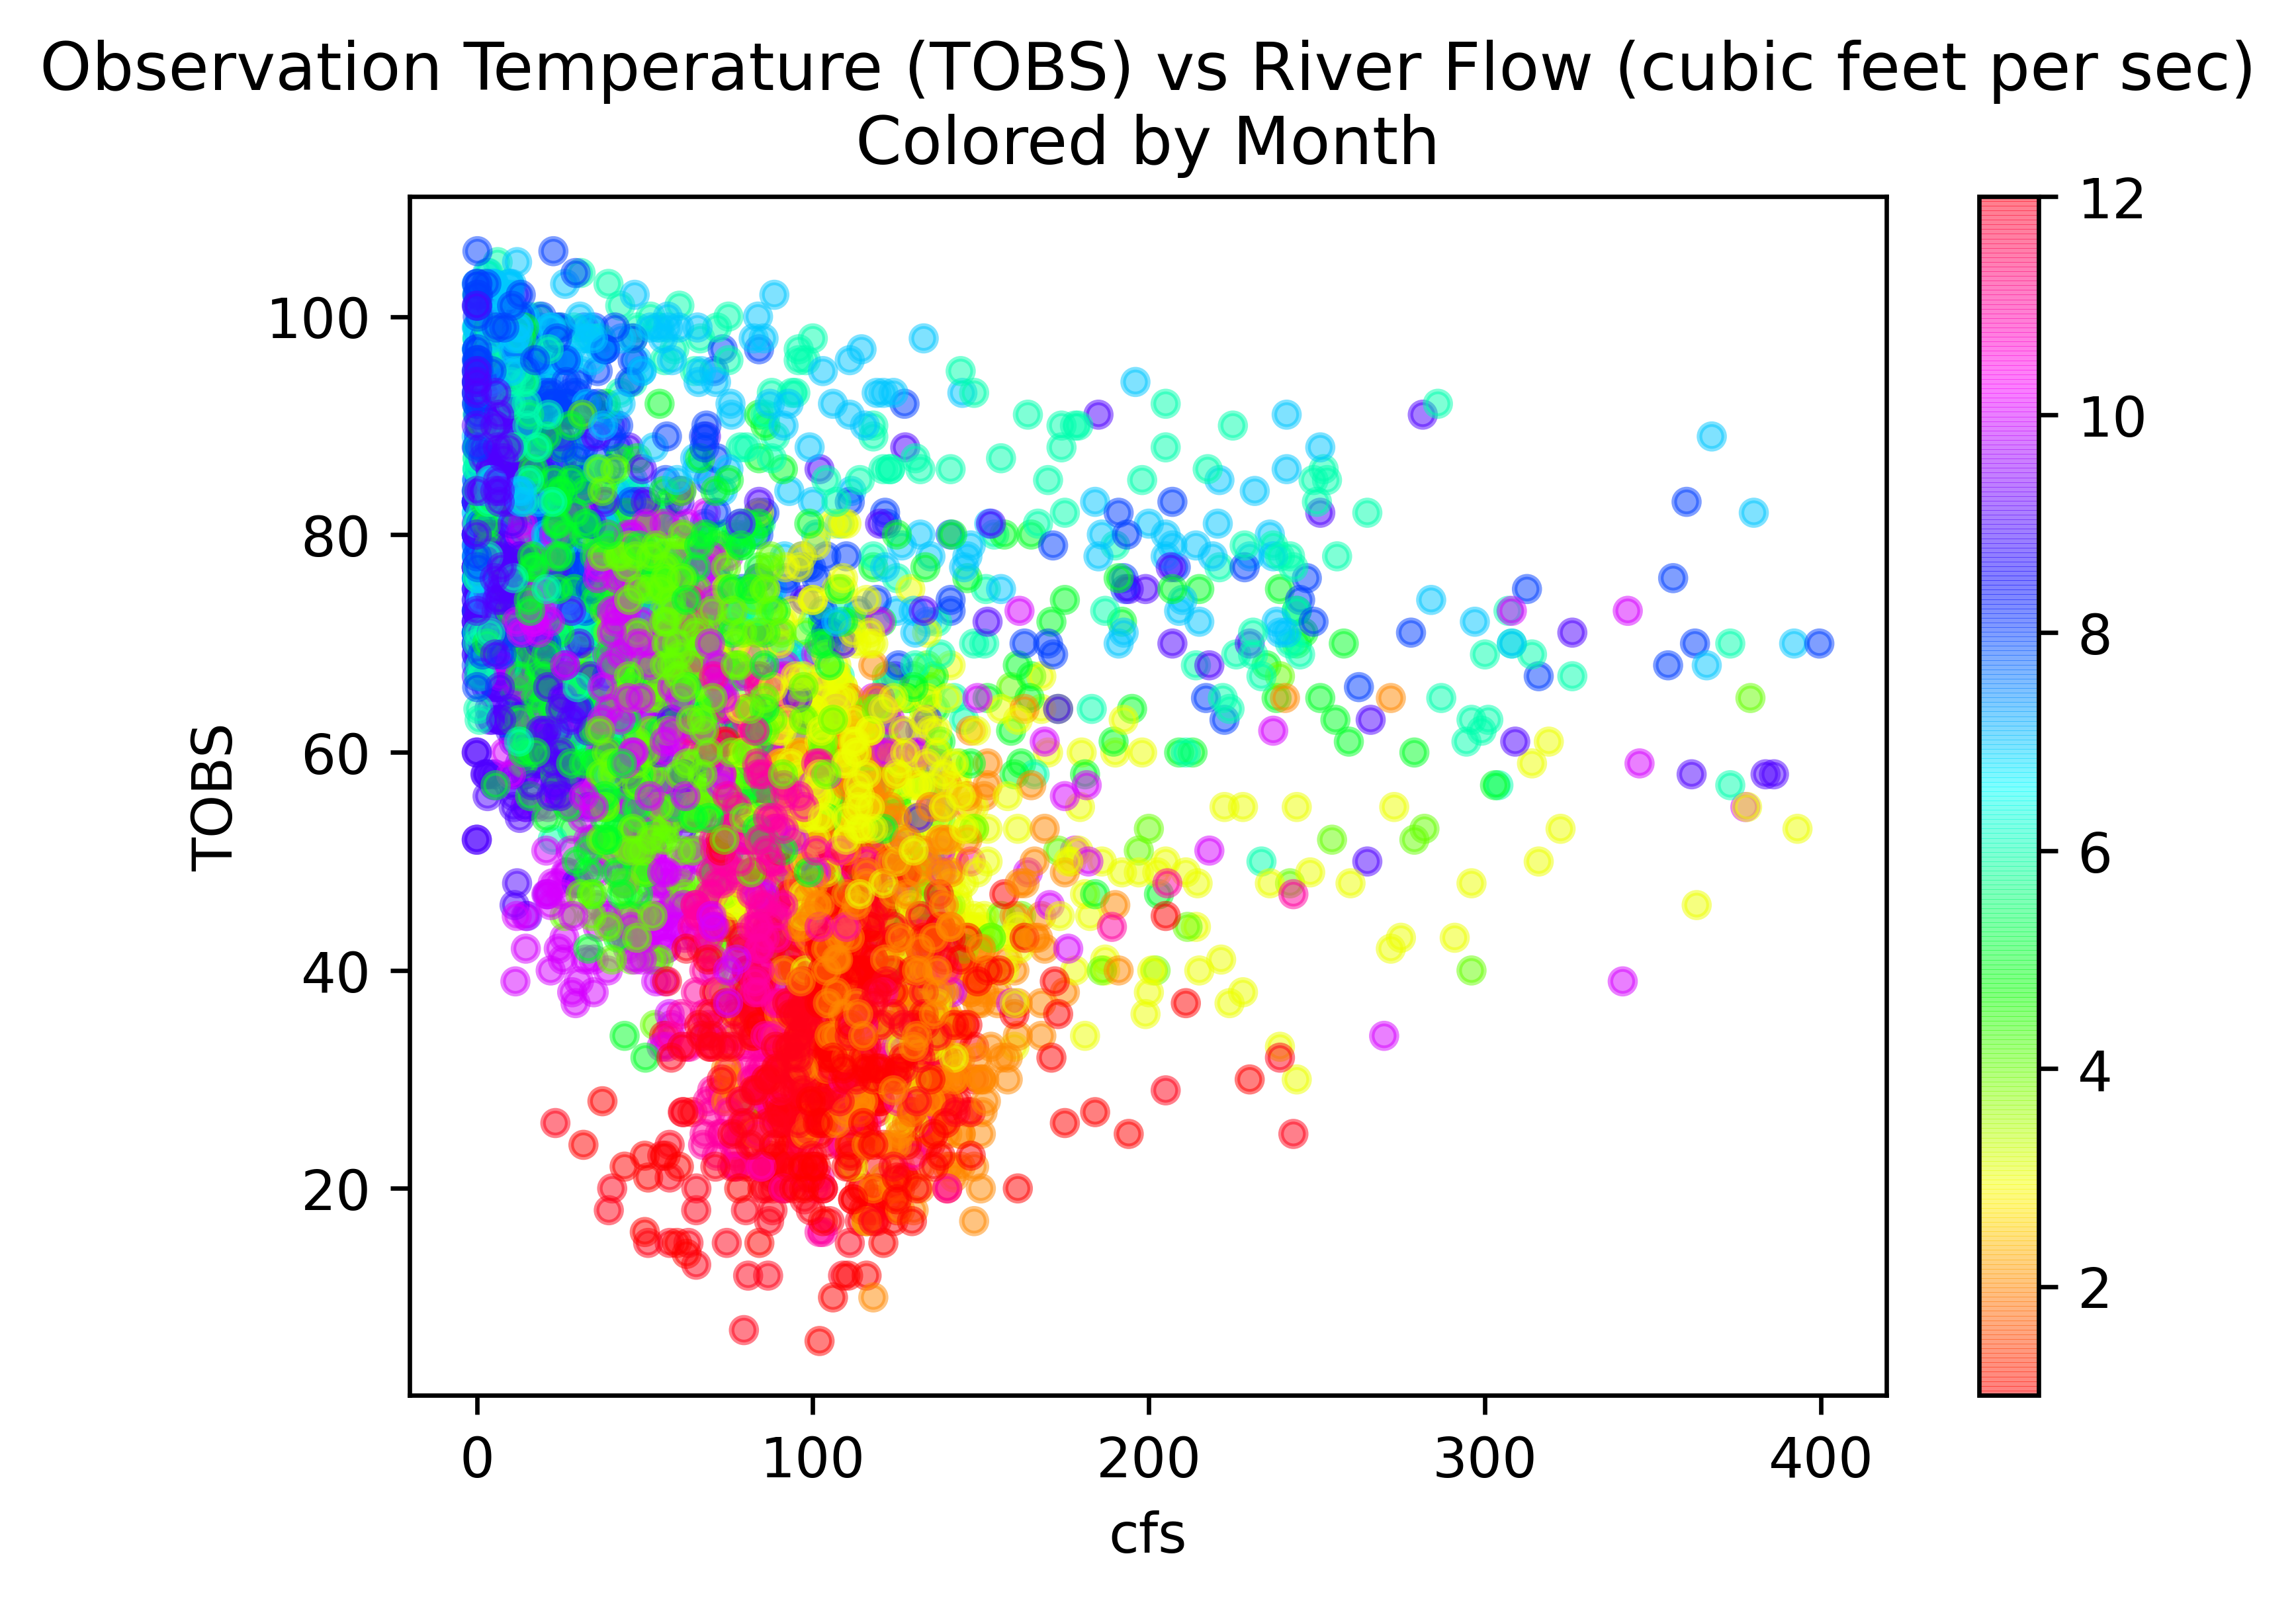

In [30]:
fig, ax = plt.subplots(dpi=600)
dd2 = (dd
 .groupby(pd.Grouper(key='datetime', freq='D'))
 .median()
 .merge(temp_df, left_index=True, right_on='DATE',
        how='inner', validate='1:1')
 .query('cfs < 400')           
)
(dd2
 .plot.scatter(x='cfs', y='TOBS', c=dd2.DATE.dt.month,
               ax=ax, cmap='hsv', alpha=.5)           
)
ax.set_title('Observation Temperature (TOBS) '
   'vs River Flow (cubic feet per sec)\nColored by Month')